In [16]:
import pandas as pd

In [17]:
df_asli = pd.read_excel("Data Output Twitter.xlsx")
df_asli = df_asli.drop(columns=['Unnamed: 0'])
df_asli

,FileName,css-175oi2r href,css-9pa8cd src,r-4qtqp9 src,css-1jxf684,css-1jxf684 2,css-1jxf684 3,css-146c3p1 href,css-146c3p1,css-1jxf684 4,...,css-175oi2r href 7,css-175oi2r href 8,css-9pa8cd src 5,css-175oi2r href 9,css-9pa8cd src 6,css-175oi2r href 10,r-1p0dtai src,r-4qtqp9 src 9,r-4qtqp9 src 10,css-1jxf684 19
0,rep 39 pelantikan,https://x.com/DS_yantie,https://pbs.twimg.com/profile_images/172497282...,https://abs-0.twimg.com/emoji/v2/svg/1f1ee-1f1...,Yanti,@DS_yantie,·,https://x.com/DS_yantie/status/184825161875374...,21 Okt,Selamat bekerja pak.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rep 39 pelantikan,https://x.com/mmamaww,https://pbs.twimg.com/profile_images/183807678...,NaN,dmn,@mmamaww,·,https://x.com/mmamaww/status/1848147313979769231,21 Okt,ganti dulu bionya pak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rep 39 pelantikan,https://x.com/DMSvoice,https://pbs.twimg.com/profile_images/182866472...,NaN,DMS Voice,@DMSvoice,·,https://x.com/DMSvoice/status/1848147810040021212,21 Okt,Selamat bertugas Pak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rep 39 pelantikan,https://x.com/afifahafra79,https://pbs.twimg.com/profile_images/164488660...,NaN,Afifah Afra,@afifahafra79,·,https://x.com/afifahafra79/status/184814908472...,21 Okt,"Selamat menjabat, Pak. Harapan kami sebenarnya...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rep 39 pelantikan,https://x.com/akoukamukita,https://pbs.twimg.com/profile_images/179037120...,https://abs-0.twimg.com/emoji/v2/svg/1f1f2-1f1...,IS@NKRI,@akoukamukita,·,https://x.com/akoukamukita/status/184814964800...,21 Okt,Selamat bertugas Bapak kesayangan NKRI. Tuhan ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,1853461890472804795_reply,https://x.com/modernize74ripe,https://pbs.twimg.com/profile_images/185329916...,NaN,meongfoodie,@modernize74ripe,·,https://x.com/modernize74ripe/status/185404545...,6 Nov,"Bapak Presiden terbaik, keren selalu!! jgn lup...",...,NaN,https://x.com/modernize74ripe/status/185404545...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4650,1853461890472804795_reply,https://x.com/abunadhr,https://pbs.twimg.com/profile_images/176154933...,NaN,Al,@abunadhr,·,https://x.com/abunadhr/status/1853562687416115698,5 Nov,Mari perbaiki diri dan negeri\nDan prioritaska...,...,NaN,https://x.com/abunadhr/status/1853562687416115...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4651,1853461890472804795_reply,https://x.com/abunadhr,https://pbs.twimg.com/profile_images/176154933...,NaN,Al,@abunadhr,·,https://x.com/abunadhr/status/1854006277711745466,6 Nov,Mari kita cari solusi bagaimana membebaskan ma...,...,NaN,https://x.com/abunadhr/status/1854006277711745...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4652,1853461890472804795_reply,https://x.com/xlsatu_,https://pbs.twimg.com/profile_images/175986141...,NaN,XL SATU,@xlsatu_,·,https://x.com/xlsatu_/status/1854920041390915956,8 Nov,"Hi Bapak Genius, maaf ya sementara ini kami ti...",...,NaN,https://x.com/xlsatu_/status/18549200413909159...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import re

def clean_text_column(dataframe, column_name):
    # Define regular expressions for URL, hashtag, and mention patterns
    url_pattern = r'https?://\S+|www\.\S+'
    hashtag_pattern = r'#'
    remove_account = r'@\w+\s*'
    mention_pattern = r'@'
    weird_pattern = r'&amp'
    date_pattern = r'\(\d{1,2}/\d{1,2}/\d{4}\)'

    # Remove URL links
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(url_pattern, '', x))

    # Remove hashtags
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(hashtag_pattern, '', x))

    # Remove account
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(remove_account, '', x))

    # Remove mentions
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(mention_pattern, '', x))

    # Remove weird pattern of &
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(weird_pattern, 'dan', x))

    # Remove date
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(date_pattern, '', x))

    # Remove characters outside of A-Z, a-z, and 0-9
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(r'[^A-Za-z0-9?!@\s]', '', x))

    # Remove numbers but keep those followed by 't'
    dataframe[column_name] = dataframe[column_name].apply(
        lambda x: re.sub(r'\b\d+\b(?!\s*t)', '', x)
    )

    #dataframe[column_name] = df[column_name].apply(remove_stopwords)

    return dataframe[column_name]

df_asli['css-1jxf684 4'] = clean_text_column(df_asli, 'css-1jxf684 4')
def clean_text(text):
    # Menghapus username
    text = re.sub(r'@\w+', '', text)

    # Menghapus tag
    text = re.sub(r'#\w+', '', text)

    # Hapus teks dalam []
    text = re.sub(r'\[\w+]', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\b\w+(?:com|org)\b', '', text)
    
    # Menghapuskan ... dan memastikan spasi
    text = re.sub(r'\.{2,}', ' ', text)

    # Menambahkan spasi di antara tanda baca dan teks yang berurutan tanpa spasi
    text = re.sub(r'([^\w\s])([^\w\s])', r'\1 \2', text)  # Menambahkan spasi antara dua tanda baca berturut-turut
    text = re.sub(r'([^\w\s])(\w)', r'\1 \2', text)  # Menambahkan spasi antara tanda baca dan kata setelahnya
    text = re.sub(r'(\w)([^\w\s])', r'\1 \2', text)  # Menambahkan spasi antara kata dan tanda baca sebelum kata

    # Penghapusan karakter yang bukan alfanumerik kecuali tanda baca
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus karakter numerik
    text = re.sub(r'\d+', '', text)

    # Menyeragamkan teks menjadi huruf kecil
    text = text.lower()

    # Menghapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text


df_asli['text_clean'] = df_asli['css-1jxf684 4'].apply(clean_text)

In [19]:
import random
rnd = random.randint(1, 10000)
display(df_asli[['css-1jxf684 4','text_clean']].sample(n=6, random_state=rnd))

,css-1jxf684 4,text_clean
2327,Mungkin saja bapak mau tau,mungkin saja bapak mau tau
545,Semoga bisa memperbaiki penegakkan hukum di In...,semoga bisa memperbaiki penegakkan hukum di in...
2296,Lucu banget dah pada kompak pake peci,lucu banget dah pada kompak pake peci
1457,Itu sih masih istimewah gak seru !! Gembleng...,itu sih masih istimewah gak seru gemblengnya h...
3771,Wahai pak prabowo itu gmna kasus tni yg nyeran...,wahai pak prabowo itu gmna kasus tni yg nyeran...
725,kok saya ga diajak pak? udh nungguin padahal j...,kok saya ga diajak pak udh nungguin padahal ja...


In [24]:
# kamus 1
sl1 = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "tuku": "beli", "batre" : "baterai", "batere" : "baterai", "baterei" : "baterai", "batrei" : "baterai",  "batrenya" : "baterai", 'antri' : 'antre', 'batery': "baterai", "tolol": "bodoh", "ri":"indonesia", 'brangkat':'berangkat', "stock":"stok", "ngomong":'bicara', 'quality':'kualitas', 'kwalitas':'kualitas', 'stasiun isi' : 'spklu', 'kendara':'kendaraan', 'hahaha' : 'tertawa', 'gk':'tidak', 'ga' : 'tidak', 'engga' : 'tidak', 'nda':'tidak', 'ngga':'tidak', 'tdk':'tidak', 'tydack':'tidak', 'iyaa':'iya', 'y' :'ya', 'bukan':'tidak', 'gamau' :'tidak ingin', 'uangnya':'uang', 'wrg':'warga', 'resiko ':'risiko','rkyt':'rakyat', 'jk':'jika', 'mlht':'melihat', 'gmn':'bagaimana', 'gimana':'bagaimana', 'bgmn':'bagaimana', 'kl':'kalau', 'kalo':'kalau', 'klu':'kalau', 'project':'proyek', 'projek':'proyek', 'pryk':'proyek', 'prjk':'proyek', 'g': 'tidak'}

# kamus2
sl2 = pd.read_csv("https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv", sep="\t")
sl2.set_index("informal", drop=True, inplace=True)
sl2 = sl2.to_dict()["formal"]
sl2

# kamus 3
sl3 = pd.read_csv("https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt", sep="\t", header=None)
sl3.set_index(0, drop=True, inplace=True)
sl3 = sl3.to_dict()[1]

# menggabungkan semua kamus slang words
sl_word = {**sl1, **sl2, **sl3}

def replace_slang(text, slang_dict):
    # Tokenize the text by words
    words = text.split()
    # Replace words found in the slang dictionary
    normalized_words = [slang_dict.get(word.lower(), word) for word in words]
    # Join the words back into a single string
    return " ".join(normalized_words)

# Apply the slang replacement to each tweet
df_asli['text_clean'] = df_asli['text_clean'].apply(replace_slang, slang_dict=sl_word)

In [25]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import nltk

# Unduh stopwords dan data tokenisasi
nltk.download('stopwords')
nltk.download('punkt')

# kamus 1: sastrawi
factory = StopWordRemoverFactory()
sw_id1 = factory.get_stop_words()

# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt", header=None)
sw_id2 = list(sw_id2[0])  # Perbaikan pada list konversi

# kamus 3
sw_id3 = [
    'yg', 'utk', 'cuman', 'deh', 'btw', 'tapi', 'gua', 'lo', 'lu', 'kalo', 'trs', 'jd', 
    'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt', 'dr', 'kpn', 'kok', 'kyk', 'donk', 
    'yah', 'u', 'ya', 'km', 'eh', 'sih', 'bang', 'br', 'kt', 'mas', 'sob', 'thx', 
    'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k', 'tp', 'hahaha', 'dg', 'duh', 
    'ye', 'wkwkwk', 'syg', 'btw', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yuk', 'wkwkw', 
    'kelas', 'iw', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt', 'klrga', 'lbh', 'cpet', 
    'ku', 'wke', 'mba', 'sdh', 'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'sh', 
    'wakakaka', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn', 'tdk', 
    'tuh', 'dah', 'kek', 'pls', 'bbrp', 'pd', 'mah', 'kpd', 'kzl', 'byar', 'si', 'siii', 
    'cm', 'sy', 'weh', 'dly', 'sdg', 'tuhh', 'yang', 'knp', 'aja', 'klo', 'shg', 'untuk', 
    'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 
    'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 
    'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 
    'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 
    'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 
    'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 
    'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 
    'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 
    'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 
    'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 
    'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'ingin', 'nggak', 
    'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 
    'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'walau', 'tolong', 'tentu', 'amat', 
    'apalagi', 'bagaimanapun', 'cnnindonesiacomekonomi',' bisnisindonesiaidarticlep','iknnusantara',
    'WapresPsikopatFufufafa', 'PrabowoTersandera', 'seretpenjarakanjokowi', 'tumbangkanfufufafa',
    'ibukotanegaranusantara', 'indonesiaemas', 'iknkotamodern', 'indonesiamaju', 'smartdefensesystem',
    'cnnindonesiacomotomotif', 'ekonomibisniscomread', 'en', 'el', 'o', 'to','e'
]

# kamus 4
sw_id4 = pd.read_csv("https://raw.githubusercontent.com/nolimitid/nolimit-kamus/master/indonesian-stopwords-complete.txt", header=None)
sw_id4 = list(sw_id4[0])

# Stopwords dari NLTK
from nltk.corpus import stopwords
id_stopwords = stopwords.words('indonesian')

# Menggabungkan semua stopwords
sw_id = sw_id1 + sw_id2 + sw_id3 + sw_id4 + id_stopwords

# Menghapus duplikasi dengan mengubahnya menjadi set
sw_id = set(sw_id)

# Fungsi untuk menghapus stopwords tanpa NLTK
def remove_stopwords(text, stopwords):
    words = text.split()  # Tokenisasi teks dengan split
    filtered_words = [word for word in words if word.lower() not in stopwords]  # Hapus stopwords
    return " ".join(filtered_words)

# Terapkan fungsi ke kolom 'text_clean' tanpa apply menggunakan iterasi
df_asli['text_clean'] = [remove_stopwords(text, sw_id) for text in df_asli['text_clean']]



[nltk_data] Downloading package stopwords to C:\Users\Annisa Sekar
[nltk_data]     Tierra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Annisa Sekar
[nltk_data]     Tierra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Tweet Bersih

In [26]:
import random
rnd = random.randint(1, 10000)
display(df_asli[['css-1jxf684 4','text_clean']].sample(n=6, random_state=rnd))

,css-1jxf684 4,text_clean
4137,Selamat bertugas Bpk prabowomudah2an indonesia...,selamat bertugas prabowomudahan indonesia kepe...
3040,Top pak,top
3918,shame on you mr prabowo \n presiden kok mainan...,shame on you mr prabowo presiden mainannya jur...
1920,Bukannya dipanggil wiwi pak?,dipanggil wiwi
3722,Ngentut,ngentut
687,Rakyat memohon benahi negara ini Bapak Prabowo...,rakyat memohon benahi negara prabowo harapan r...


In [32]:
# Nilai target yang ingin dicocokkan
target_values = ['20', '21', '22', '23', '24', '25', '39']

# Memisahkan baris yang FileName-nya mengandung nilai target ke DataFrame baru
df_rakyat = df_asli[df_asli['FileName'].str.contains('|'.join(target_values), na=False)]

# Menghapus baris yang memiliki nilai target dari DataFrame asli
df_politik = df_asli[~df_asli['FileName'].str.contains('|'.join(target_values), na=False)]

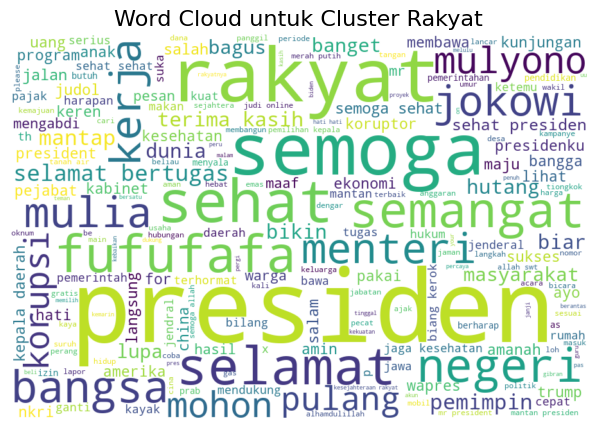

In [41]:
stp = ['indonesia', 'negara', 'prabowo', 'iya', 'orang', 'subianto', 'a', 'you', 'the', 'with', 'sir', 'and']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat word cloud
def create_wordcloud(text, title, custom_stopwords=None):
    # Jika custom_stopwords tidak diberikan, gunakan set stopwords default
    if custom_stopwords is None:
        custom_stopwords = set()

    wordcloud = WordCloud(
        width=900,
        height=600,
        background_color='white',
        stopwords=stp  # Menambahkan custom stopwords di sini
    ).generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


# Gabungkan semua nama kelas untuk setiap kategori materi
text = " ".join(df_rakyat['text_clean'].values)

# Panggil fungsi untuk membuat WordCloud
create_wordcloud(text, 'Word Cloud untuk Cluster Rakyat', stp)

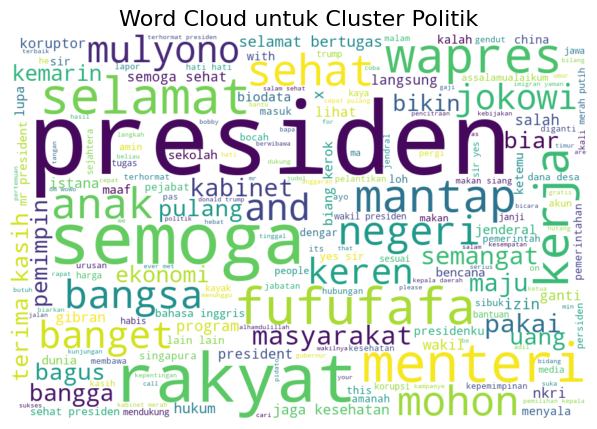

In [ ]:
stp = ['indonesia', 'negara', 'prabowo', 'iya', 'orang', 'subianto', 'a', 'you', 'the', 'with', 'sir', 'and']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat word cloud
def create_wordcloud(text, title, custom_stopwords=None):
    # Jika custom_stopwords tidak diberikan, gunakan set stopwords default
    if custom_stopwords is None:
        custom_stopwords = set()

    wordcloud = WordCloud(
        width=900,
        height=600,
        background_color='white',
        stopwords=stp  # Menambahkan custom stopwords di sini
    ).generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


# Gabungkan semua nama kelas untuk setiap kategori materi
text = " ".join(df_politik['text_clean'].values)

# Panggil fungsi untuk membuat WordCloud
create_wordcloud(text, 'Word Cloud untuk Cluster Politik', stp)